In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# 1️⃣ Charger le fichier
Malaria = pd.read_csv("Malaria.csv")


In [58]:
Malaria.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [59]:
#Elle te permet de connaître la taille exacte de ton tableau de données (DataFrame).
Malaria.shape

(594, 27)

In [60]:
#cette commande donne un résumé complet de la structure de ton fichier de données
Malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [61]:
# Vérifie cellule par cellule si une valeur est manquante (NaN).
#Elle renvoie un tableau de booléens (True si c’est vide, False sinon).
Malaria.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [62]:
# permet de voir le fichier double
Malaria.duplicated().sum()

np.int64(0)

In [63]:
# 2️⃣ Supprimer les colonnes inutiles ou textuelles non exploitables
cols_to_drop = [
    ' People using safely managed drinking water services, rural (% of rural population)',
    'Rural population (% of total population)  ',
    'People using at least basic sanitation services, rural (% of rural population)'
]
Malaria.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Remplacer les valeurs manquantes numériques par la médiane
num_cols = Malaria.select_dtypes(include=[np.number]).columns
Malaria[num_cols] = Malaria[num_cols].fillna(Malaria[num_cols].median())

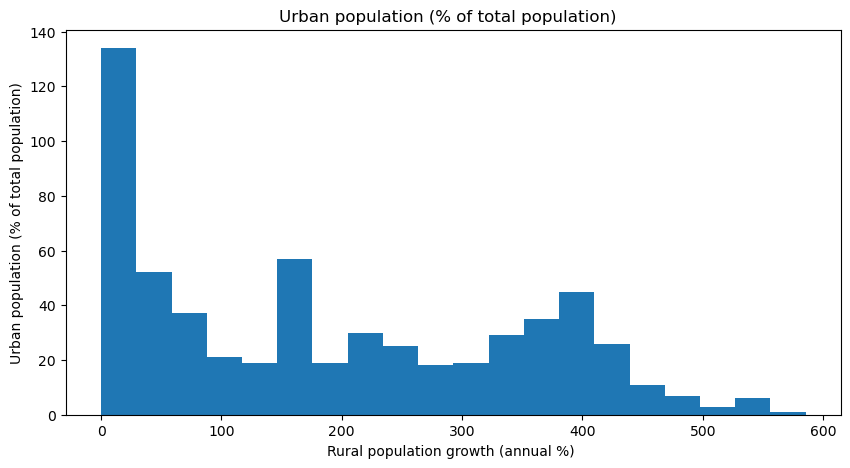

In [64]:
plt.figure(figsize=(10,5))
plt.hist(Malaria["Incidence of malaria (per 1,000 population at risk)"], bins=20)
plt.title("Urban population (% of total population)  ")
plt.xlabel("Rural population growth (annual %) ")
plt.ylabel("Urban population (% of total population)")
plt.show()

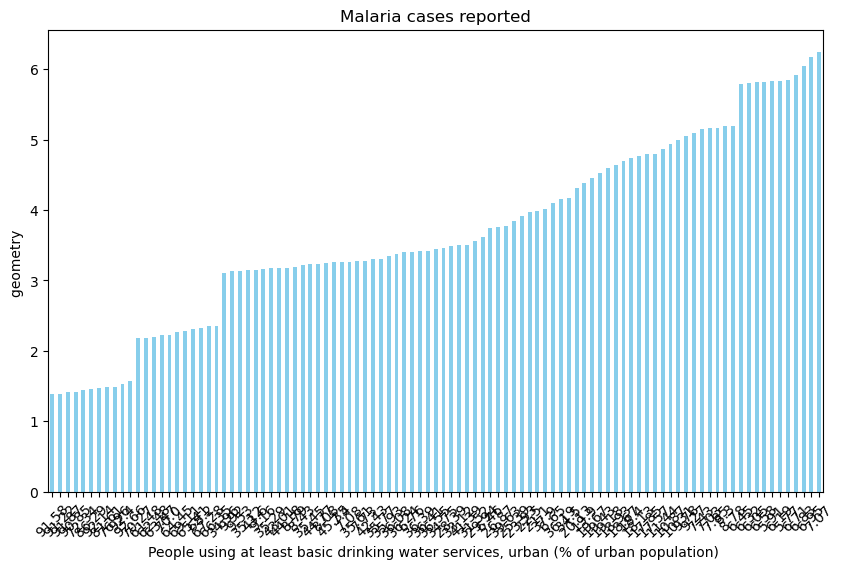

In [65]:
region_stats = Malaria.groupby("People using safely managed drinking water services (% of population)")["Urban population growth (annual %)"].mean().sort_values()

plt.figure(figsize=(10,6))
region_stats.plot(kind="bar", color="skyblue")
plt.title("Malaria cases reported")
plt.xlabel("People using at least basic drinking water services, urban (% of urban population) ")
plt.ylabel("geometry ")
plt.xticks(rotation=45)
plt.show()

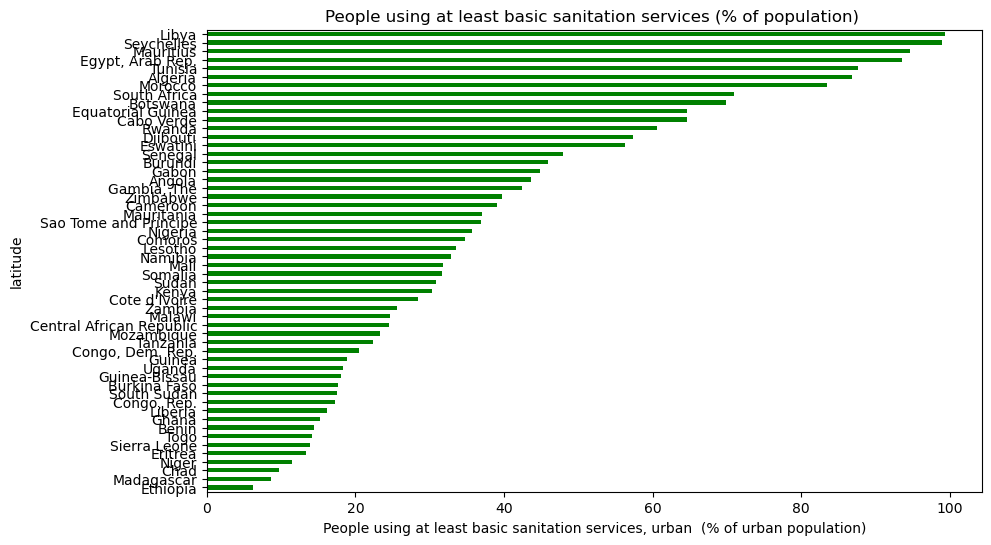

In [66]:
art_region = Malaria.groupby("Country Name")["People using at least basic sanitation services (% of population)"].mean().sort_values()

plt.figure(figsize=(10,6))
art_region.plot(kind="barh", color="green")
plt.title("People using at least basic sanitation services (% of population) ")
plt.xlabel("People using at least basic sanitation services, urban  (% of urban population)")
plt.ylabel("latitude")
plt.show()

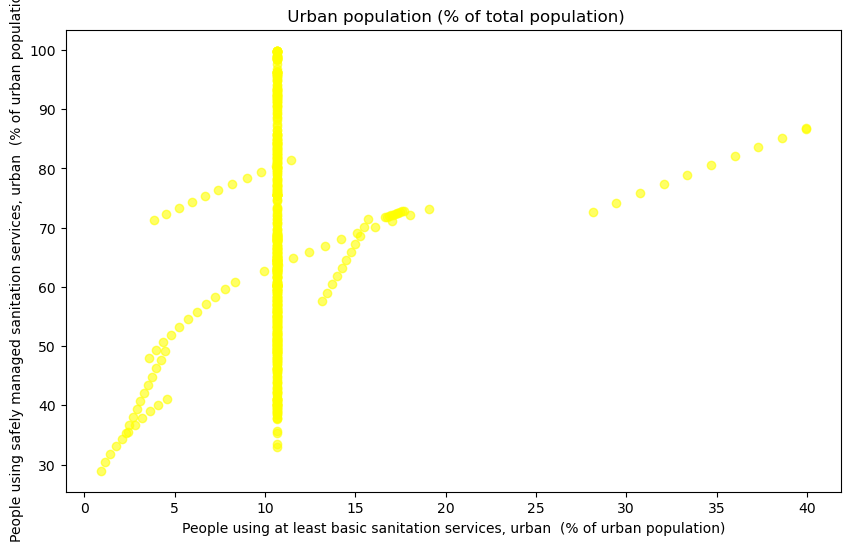

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(Malaria["People using safely managed drinking water services, rural (% of rural population)"], 
            Malaria["People using at least basic drinking water services (% of population)"],
            alpha=0.6, color="yellow")

plt.title(" Urban population (% of total population)")
plt.xlabel("People using at least basic sanitation services, urban  (% of urban population)")
plt.ylabel("People using safely managed sanitation services, urban  (% of urban population)")
plt.show()

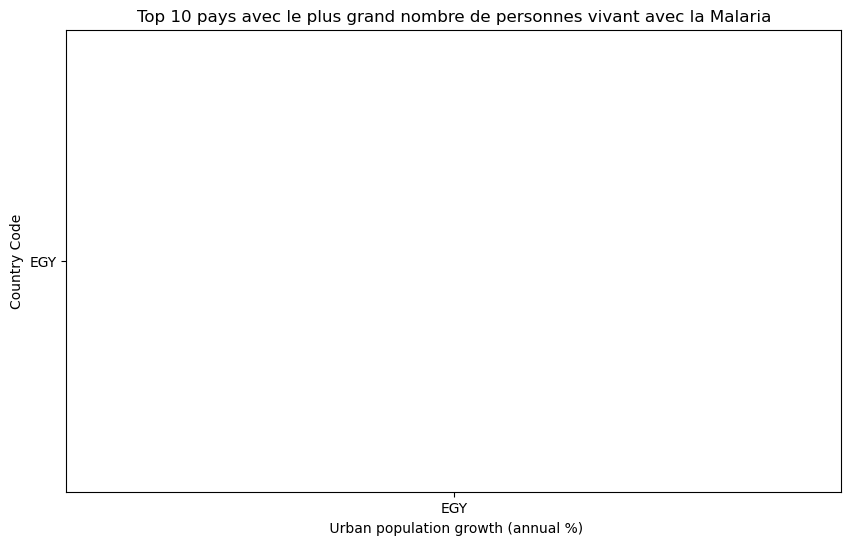

In [68]:
top10 = Malaria.nlargest(10, "People using at least basic sanitation services, urban  (% of urban population)")[["Country Code","Children with fever receiving antimalarial drugs (% of children under age 5 with fever)"]]

plt.figure(figsize=(10,6))
plt.barh(top10["Country Code"], top10["Country Code"], color="crimson")
plt.title("Top 10 pays avec le plus grand nombre de personnes vivant avec la Malaria")
plt.xlabel(" Urban population growth (annual %)")
plt.ylabel("Country Code")
plt.gca().invert_yaxis()
plt.show()

In [69]:
Malaria = Malaria.dropna(subset=["People using at least basic sanitation services, urban  (% of urban population)"])

In [70]:
# Remplacer les valeurs manquantes textuelles par "Inconnu"
cat_cols = Malaria.select_dtypes(include=['object']).columns
Malaria[cat_cols] = Malaria[cat_cols].fillna("Inconnu")


In [71]:
# Encoder la colonne 'WHO Region' en nombres
if 'WHO Region' in Malaria.columns:
    Malaria['WHO Region'] = Malaria['WHO Region'].astype('category').cat.codes

In [72]:
# Supprimer les doublons
Malaria.drop_duplicates(inplace=True)


In [73]:

# 2️⃣ Supprimer les colonnes inutiles ou textuelles non exploitables
print("\n=== INFORMATIONS APRÈS NETTOYAGE ===")
print(Malaria.info())
print("\n=== VALEURS MANQUANTES APRÈS NETTOYAGE ===")
print(Malaria.isnull().sum())


=== INFORMATIONS APRÈS NETTOYAGE ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 26 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      594 non-null    float64
 4   Malaria cases reported                                                                   594 non-null    float64
 5   Use of insecticide-treated

In [74]:
# Sauvegarder le fichier propre
vih.to_csv("Malarie_clean.csv", index=False)
print("\n💾 Fichier nettoyé enregistré sous le nom : Malaria_clean.csv")


💾 Fichier nettoyé enregistré sous le nom : Malaria_clean.csv


In [75]:
# 3️⃣ Nettoyage des valeurs manquantes (NaN)
# On va d’abord compter les lignes vides
print("\n=== Pourcentage de valeurs manquantes par colonne ===")
print(round(Malaria.isnull().mean() * 100, 2))


=== Pourcentage de valeurs manquantes par colonne ===
Country Name                                                                               0.0
Year                                                                                       0.0
Country Code                                                                               0.0
Incidence of malaria (per 1,000 population at risk)                                        0.0
Malaria cases reported                                                                     0.0
Use of insecticide-treated bed nets (% of under-5 population)                              0.0
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    0.0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      0.0
People using safely managed drinking water services (% of population)                      0.0
People using safely managed drinking water services, rural (% of rural population)        

In [76]:
# Remplacer les valeurs manquantes textuelles (ex: WHO Region, Country) par "Inconnu"
cat_cols = Malaria.select_dtypes(include=['object']).columns
Malaria[cat_cols] = Malaria[cat_cols].fillna("Inconnu")


In [79]:
# 4️⃣ Vérification après nettoyage
print("\n=== Vérification après nettoyage ===")
print(Malaria.isnull().sum())


=== Vérification après nettoyage ===
Country Name                                                                               0
Year                                                                                       0
Country Code                                                                               0
Incidence of malaria (per 1,000 population at risk)                                        0
Malaria cases reported                                                                     0
Use of insecticide-treated bed nets (% of under-5 population)                              0
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      0
People using safely managed drinking water services (% of population)                      0
People using safely managed drinking water services, rural (% of rural population)         0
People using safely managed drin

In [80]:
# 7️⃣ Vérification finale
print("\n=== INFOS APRÈS NETTOYAGE FINAL ===")
print(Malaria.info())
print("\n=== APERÇU DES DONNÉES PROPRES ===")
print(Malaria.head())


=== INFOS APRÈS NETTOYAGE FINAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 26 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      594 non-null    float64
 4   Malaria cases reported                                                                   594 non-null    float64
 5   Use of insecticide-treated 